# CCInx

**Language:** R

**Code Resource:** https://baderlab.github.io/CCInx/

**Claiming:** Inference of intercellular signaling networks (ligand-receptor)

**Method:** A function that assumes the gene statistics represent differential expression between experimental conditions, and weights the predicted interactions accordingly, otherwise, predictions will be weighted by expression magnitude per cell type

**Database:** Bader lab ligand-receptor database generated by Ruth Isserlin

## Input
* a list of dataframes, where each named list entry represents a cell type, and its data frame contains the differential expression statistics for genes in that cell type (CCInx can automatically generate the *GeneStatList* input for *BuildCCInx* from a *Seurat* or *SingleCellExperiment* object)

## Installation

In [ ]:
devtools::install_github("BaderLab/CCInx")

### Ranking nodes by differential expression between conditions
Here we’ll demonstrate the standard use case using data from a recent study of aging mouse brain, where differential expression testing was performed between young and aging neuronal cell types.

In [1]:
library(CCInx)
load(system.file("DemoData/DemoDE.RData",package="CCInx"))
lapply(deL,head)

Loading required package: shiny



,pval,padj,logFC,DetectPctYoung,DetectPctOld
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mt-Nd4,0.000007580,0.03565106,-0.3873342,1.00000000,0.9948718
mt-Cytb,0.000012300,0.03565106,-0.3685228,1.00000000,1.0000000
Fam3c,0.000013900,0.03565106,0.3439192,0.03731343,0.2307692
mt-Co3,0.000069600,0.12934011,-0.3110772,1.00000000,1.0000000
Sepw1,0.000098700,0.15294014,-0.6145720,0.56716418,0.5487179
mt-Nd1,0.000151239,0.18006463,-0.3097862,1.00000000,1.0000000
,pval,padj,logFC,DetectPctYoung,DetectPctOld
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Malat1,1.11e-59,1.43e-55,0.3297557,0.9965659,0.9982379


The CCInx network is built using the list of gene expression data frames. The output of *BuildCCInx* is a list of cell type pairs, with each entry storing both the edge list and node metadata. These can be exported as .csv files for use in *Cytoscape*.

In [3]:
inx <- BuildCCInx(GeneStatList=deL,
                  GeneMagnitude="logFC",
                  GeneStatistic="padj",
                  Species="mmusculus")

Scaling node weights per cell type...

Building node metadata...

Building edge list...



In [4]:
str(inx)

List of 2
 $ nodes:'data.frame':	471 obs. of  10 variables:
  ..$ node          : chr [1:471] "Fam3c_DOPA" "Cst3_DOPA" "Cntn5_DOPA" "Acvr1b_DOPA" ...
  ..$ gene          : chr [1:471] "Fam3c" "Cst3" "Cntn5" "Acvr1b" ...
  ..$ cellType      : chr [1:471] "DOPA" "DOPA" "DOPA" "DOPA" ...
  ..$ proteinType   : chr [1:471] "Ligand" "ECM/Ligand" "Receptor" "Receptor" ...
  ..$ nodeWeight    : num [1:471] 0.67 -0.792 0.645 0.377 0.473 ...
  ..$ pval          : num [1:471] 1.39e-05 3.89e-04 1.86e-03 6.18e-03 1.09e-02 ...
  ..$ padj          : num [1:471] 0.0357 0.3289 0.6796 0.7651 0.9918 ...
  ..$ logFC         : num [1:471] 0.344 -0.488 0.331 0.194 0.243 ...
  ..$ DetectPctYoung: num [1:471] 0.0373 0.8358 0.0896 0.0522 0.1194 ...
  ..$ DetectPctOld  : num [1:471] 0.231 0.8 0.303 0.149 0.287 ...
 $ edges:'data.frame':	1606 obs. of  3 variables:
  ..$ nodeA     : chr [1:1606] "Acvr1_DOPA" "Acvr1_DOPA" "Acvr1b_DOPA" "Acvr1b_DOPA" ...
  ..$ nodeB     : chr [1:1606] "Acvr1b_DOPA" "Bmpr1a_DOPA" "A

In [5]:
head(inx$edges)

,nodeA,nodeB,edgeWeight
,<chr>,<chr>,<dbl>
Acvr1_DOPA~Acvr1b_DOPA,Acvr1_DOPA,Acvr1b_DOPA,0.2790543
Acvr1_DOPA~Bmpr1a_DOPA,Acvr1_DOPA,Bmpr1a_DOPA,0.1935704
Acvr1b_DOPA~Acvr1c_DOPA,Acvr1b_DOPA,Acvr1c_DOPA,0.4319298
Acvr1b_DOPA~Bmpr1a_DOPA,Acvr1b_DOPA,Bmpr1a_DOPA,0.2919875
Acvr1b_DOPA~Hsp90aa1_DOPA,Acvr1b_DOPA,Hsp90aa1_DOPA,0.4434583
Acvr1b_DOPA~Snx2_DOPA,Acvr1b_DOPA,Snx2_DOPA,0.2785116


In [6]:
head(inx$nodes)

,node,gene,cellType,proteinType,nodeWeight,pval,padj,logFC,DetectPctYoung,DetectPctOld
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Fam3c_DOPA,Fam3c_DOPA,Fam3c,DOPA,Ligand,0.6700919,0.000013900,0.03565106,0.3439192,0.03731343,0.2307692
Cst3_DOPA,Cst3_DOPA,Cst3,DOPA,ECM/Ligand,-0.7916701,0.000389130,0.32885040,-0.4877179,0.83582090,0.8000000
Cntn5_DOPA,Cntn5_DOPA,Cntn5,DOPA,Receptor,0.6451822,0.001858835,0.67958515,0.3311345,0.08955224,0.3025641
Acvr1b_DOPA,Acvr1b_DOPA,Acvr1b,DOPA,Receptor,0.3774713,0.006177912,0.76506521,0.1937341,0.05223881,0.1487179
Gabra1_DOPA,Gabra1_DOPA,Gabra1,DOPA,Receptor,0.4729222,0.010928797,0.99181188,0.2427234,0.11940299,0.2871795
Gabrd_DOPA,Gabrd_DOPA,Gabrd,DOPA,Receptor,0.5560968,0.011594485,1.00000000,0.2854121,0.28358209,0.4769231


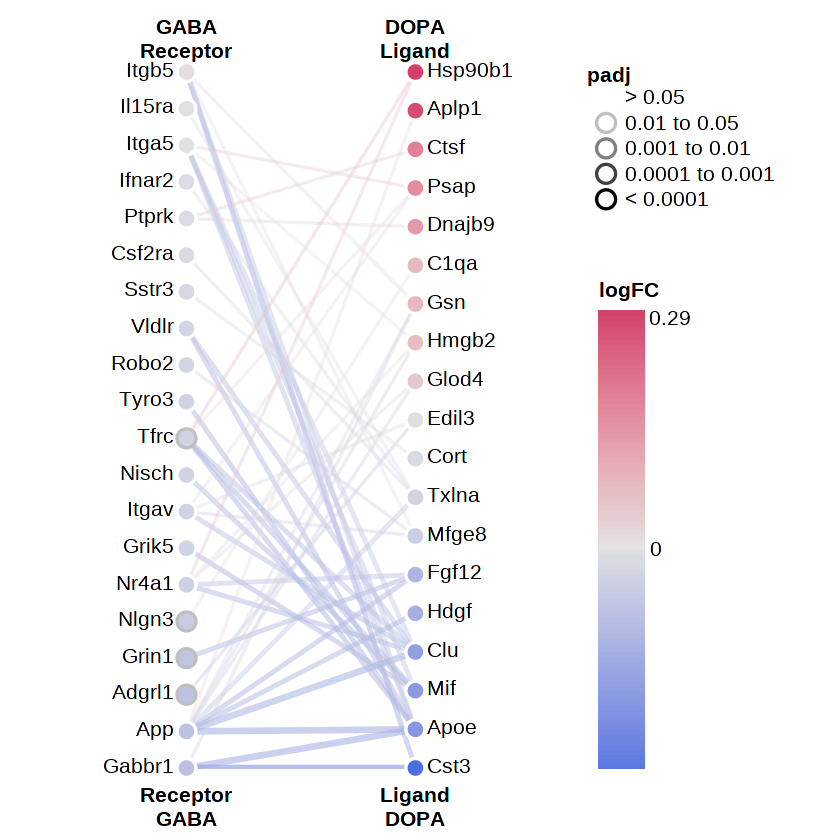

In [7]:
PlotCCInx(INX=inx,
          cellTypeA="GABA",cellTypeB="DOPA",
          proteinTypeA="Receptor",proteinTypeB="Ligand",
          TopEdges=50)

In [ ]:
ViewCCInx(inx) # for a Shiny viewer

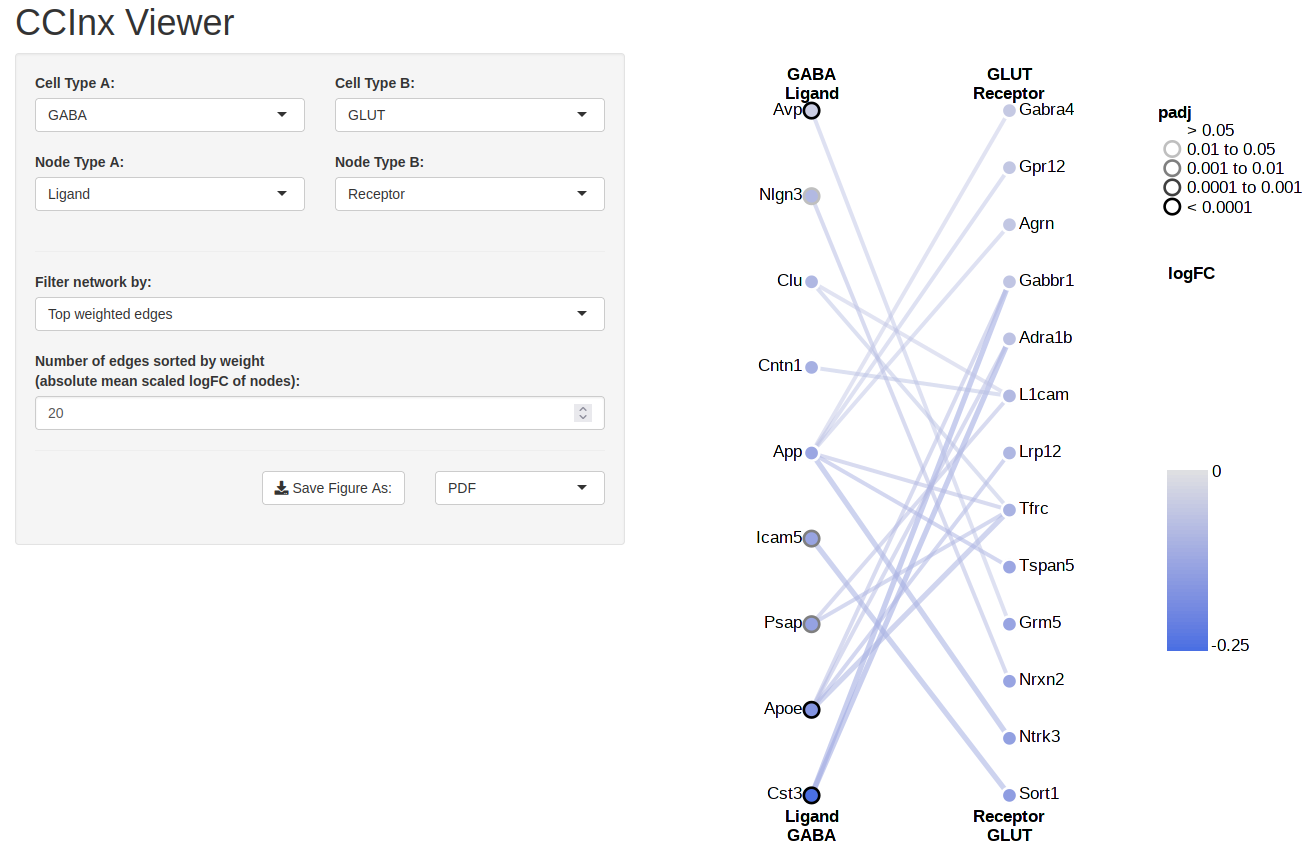

### Ranking nodes by expression magnitude
If no comparisons have been made experimentally, CCInx can use gene expression magnitude to rank nodes in its predicted interactions. Here we use a subset of data from the developing murine cerebral cortex to demonstrate.

In [9]:
load(system.file("DemoData/DemoExpr.RData",package="CCInx"))
show(e13cortex)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    

class: SingleCellExperiment 
dim: 843 323 
metadata(0):
assays(1): logcounts
rownames(843): 1600012H06Rik 1700066M21Rik ... Zfyve27 Znrf3
rowData names(0):
colnames(323): TACTAGATGCTA AAATTCGTCGGT ... GCAAAATTTCAC TAAAACCTAATT
colData names(1): cellTypes


We can automatically generate the *GeneStatList* input for *BuildCCInx* from a Seurat or SingleCellExperiment object by using one of the functions from scClustViz, repurposed here in the following function:

In [11]:
gsl <- BuildGeneStatList(inD=e13cortex,
                         cl=colData(e13cortex)$cellTypes,
                         assayType="logcounts")

Loading required package: scClustViz

-- Calculating cluster-wise gene statistics --



In [12]:
lapply(gsl[1:3],head)

,DetectRate,MeanDetectGeneExpr,MeanNormGeneExpr
,<dbl>,<dbl>,<dbl>
1600012H06Rik,0.034188034,0.96027540,-3.846653
1700066M21Rik,0.042735043,0.60205847,-3.881925
4931414P19Rik,0.034188034,-0.08063235,-4.823379
Abca1,0.017094017,1.26484824,-4.502413
Abhd15,0.008547009,-0.67777189,-6.893249
Acvr1,0.008547009,0.87558854,-5.736874
,DetectRate,MeanDetectGeneExpr,MeanNormGeneExpr
,<dbl>,<dbl>,<dbl>
1600012H06Rik,0.01904762,-0.11515394,-5.599577


In [14]:
inx <- BuildCCInx(GeneStatList=gsl,
                  Species="mmusculus")
head(inx$edges)
head(inx$nodes)

Scaling node weights per cell type...

Building node metadata...

Building edge list...



,nodeA,nodeB,edgeWeight
,<chr>,<chr>,<dbl>
Abca1_ProjectionNeurons~Pltp_ProjectionNeurons,Abca1_ProjectionNeurons,Pltp_ProjectionNeurons,0.1713428
Abca1_ProjectionNeurons~Slc1a5_ProjectionNeurons,Abca1_ProjectionNeurons,Slc1a5_ProjectionNeurons,0.2671990
Abca1_ProjectionNeurons~Slc7a1_ProjectionNeurons,Abca1_ProjectionNeurons,Slc7a1_ProjectionNeurons,0.1981018
Acvr1_ProjectionNeurons~Acvr1b_ProjectionNeurons,Acvr1_ProjectionNeurons,Acvr1b_ProjectionNeurons,0.3138731
Acvr1_ProjectionNeurons~Acvr2a_ProjectionNeurons,Acvr1_ProjectionNeurons,Acvr2a_ProjectionNeurons,0.2667038
Acvr1_ProjectionNeurons~Acvr2b_ProjectionNeurons,Acvr1_ProjectionNeurons,Acvr2b_ProjectionNeurons,0.3765668


,node,gene,cellType,proteinType,nodeWeight,DetectRate,MeanDetectGeneExpr,MeanNormGeneExpr
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1600012H06Rik_ProjectionNeurons,1600012H06Rik_ProjectionNeurons,1600012H06Rik,ProjectionNeurons,Ligand,0.38054423,0.034188034,0.96027540,-3.846653
1700066M21Rik_ProjectionNeurons,1700066M21Rik_ProjectionNeurons,1700066M21Rik,ProjectionNeurons,Ligand,0.37689638,0.042735043,0.60205847,-3.881925
4931414P19Rik_ProjectionNeurons,4931414P19Rik_ProjectionNeurons,4931414P19Rik,ProjectionNeurons,Ligand,0.27952939,0.034188034,-0.08063235,-4.823379
Abca1_ProjectionNeurons,Abca1_ProjectionNeurons,Abca1,ProjectionNeurons,Receptor,0.31272425,0.017094017,1.26484824,-4.502413
Abhd15_ProjectionNeurons,Abhd15_ProjectionNeurons,Abhd15,ProjectionNeurons,Ligand,0.06545941,0.008547009,-0.67777189,-6.893249
Acvr1_ProjectionNeurons,Acvr1_ProjectionNeurons,Acvr1,ProjectionNeurons,Receptor,0.18505395,0.008547009,0.87558854,-5.736874


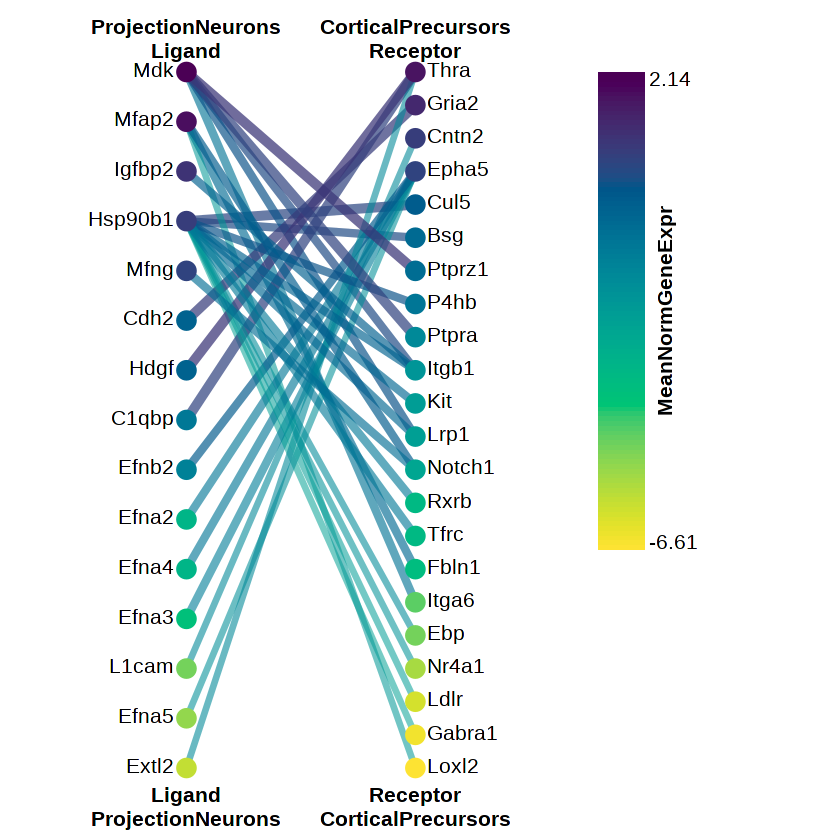

In [15]:
PlotCCInx(INX=inx,
          cellTypeA="ProjectionNeurons",cellTypeB="CorticalPrecursors",
          proteinTypeA="Ligand",proteinTypeB="Receptor",
          GeneMagnitudeThreshold=.5)

Last updated: June 12,2021